In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from pandas.tseries.offsets import DateOffset
import warnings
warnings.filterwarnings('ignore')

# TSA - Times series Analysis

In [2]:
df = pd.read_csv('Time Series Data.csv')
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [3]:
df.columns = ['Time Frame', 'Sales of Champagne']
df.head()

,Time Frame,Sales of Champagne
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [4]:
df.tail()

,Time Frame,Sales of Champagne
100,1972-05,4618
101,1972-06,5312
102,1972-07,4298
103,1972-08,1413
104,1972-09,5877


In [5]:
df.shape

(105, 2)

In [6]:
df.dtypes

Time Frame            object
Sales of Champagne     int64
dtype: object

In [7]:
df['Time Frame'] = pd.to_datetime(df['Time Frame'])

In [8]:
df.dtypes

Time Frame            datetime64[ns]
Sales of Champagne             int64
dtype: object

In [9]:
df.head()

,Time Frame,Sales of Champagne
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


In [10]:
df.set_index('Time Frame', inplace = True)

In [11]:
df.head()

,Sales of Champagne
Time Frame,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [12]:
df.describe()

,Sales of Champagne
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


In [13]:
df.skew()

Sales of Champagne    1.639003
dtype: float64

In [14]:
df.kurt()

Sales of Champagne    2.702889
dtype: float64

<AxesSubplot:xlabel='Time Frame'>

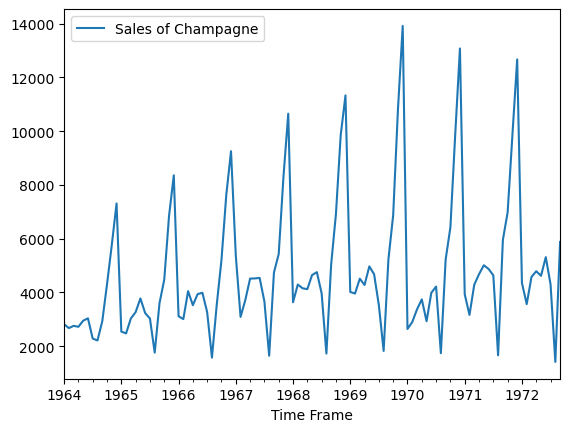

In [15]:
df.plot()

From the graph we can figure out sales are highest in last quarter as it is new year or christmas eve.

We find if the data is stationery or non-stationery depending on the output we get from the AD fuller test

### AD fuller:
- AD fuller runs on 2 hpothesis:
- ho - Time series is non stationery
- h1 - Time series is stationery

In [16]:
adf = adfuller(df['Sales of Champagne'])

In [17]:
adf

(-1.8335930563276248,
 0.363915771660244,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

- The First value - ADF test statistics
- The Second Value - p-value
- The Third value - No. of lags
- The fourth value - No. of observed value

- Since the p-value is greater than 0.5, we confirm that time series is NON STATIONERY
 

###  Taking first order difference inorder to make time series stationery

In [18]:
df['Sales_with_first_order_diff'] = df['Sales of Champagne'] - df['Sales of Champagne'].shift(1)

In [19]:
df.head()

,Sales of Champagne,Sales_with_first_order_diff
Time Frame,,
1964-01-01,2815,NaN
1964-02-01,2672,-143.0
1964-03-01,2755,83.0
1964-04-01,2721,-34.0
1964-05-01,2946,225.0


In [20]:
adf1 = adfuller(df['Sales_with_first_order_diff'].dropna())

In [21]:
adf1

(-7.189896448051015,
 2.5196204473868427e-10,
 11,
 92,
 {'1%': -3.503514579651927,
  '5%': -2.893507960466837,
  '10%': -2.583823615311909},
 1466.8267262915892)

<AxesSubplot:xlabel='Time Frame'>

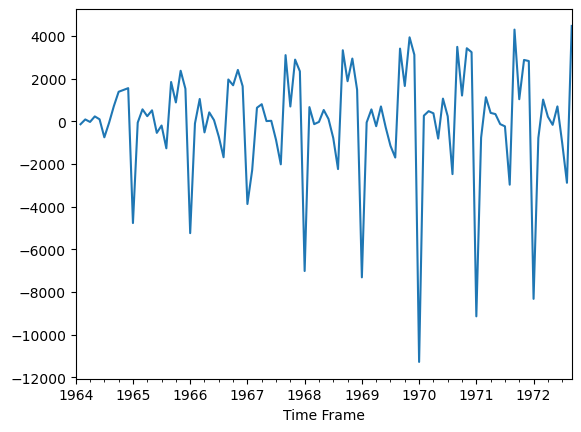

In [22]:
df['Sales_with_first_order_diff'].plot()

After taking first order we can confirm time series is stationery with p-value less than 0.05 we reject null hypothesis that we accept alternative hypothesis(time series stationery)

Plotting ACF(Auto Correlation function) and P-ACF(Partial Auto Correlation function) to find the 
- p-order 
- Q- moving average 
- D - Difference. These are the values of the ARIMA model 

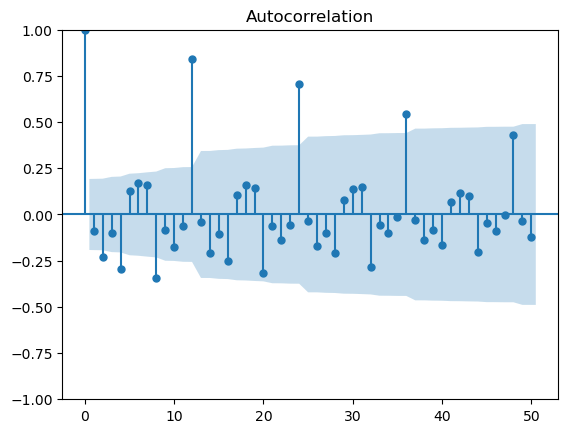

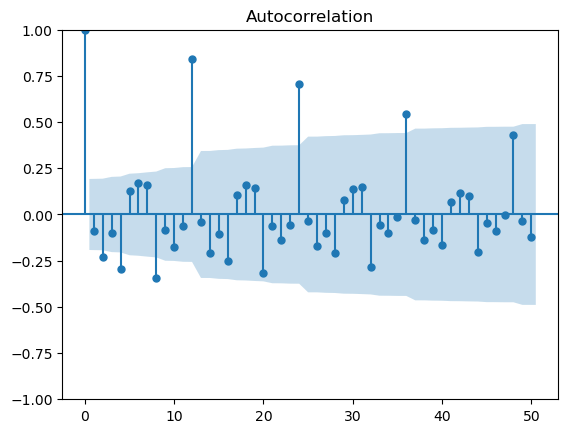

In [23]:
plot_acf(df['Sales_with_first_order_diff'].dropna(), lags=50)

- From the ACF plot we find the p-value. If we find after certain no. of lags the plot remains in the blue curve we consider those many lags as p value or the order of ARIMA model.

- Here the p value is 1 

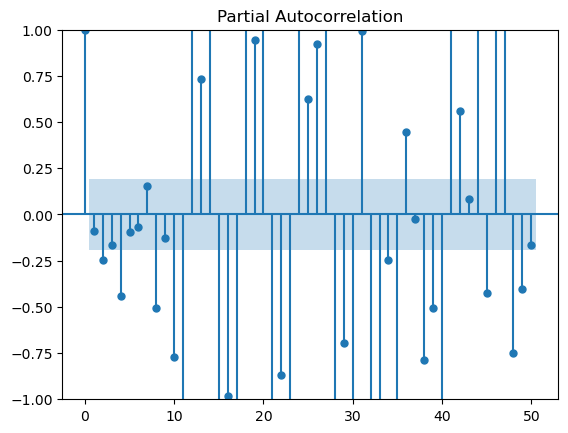

<Figure size 1500x1000 with 0 Axes>

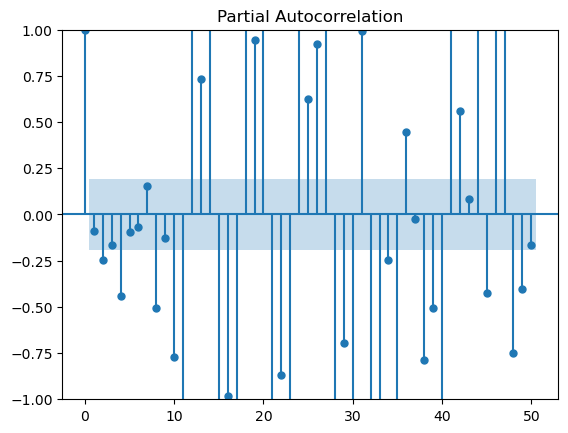

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,10))
plot_pacf(df['Sales_with_first_order_diff'].dropna(), lags=50)

From the P-ACF plot we find the q-value. If we find after certain no. of lags the points abruptly falls to zero we take those points as Q value to the moving average for the ARIMA model.

Here the q value is 1. 

### Building ARIMA

In [25]:
arima = ARIMA(df['Sales of Champagne'], order = (1,1,1))
# order = (p,d,q)

In [26]:
arima = arima.fit()

In [27]:
df['Arima_forecast'] = arima.predict(start = 90, end = 105, dynamic= True)

<AxesSubplot:xlabel='Time Frame'>

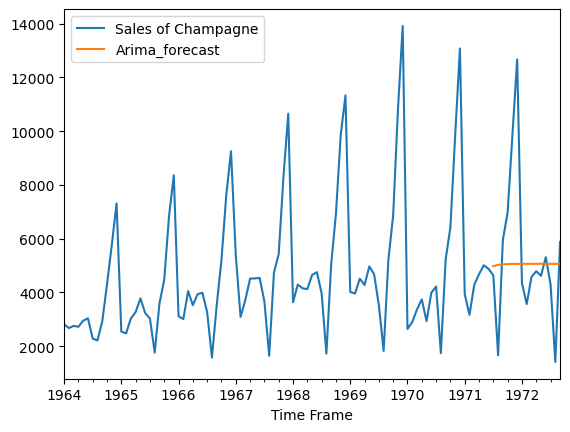

In [28]:
df[['Sales of Champagne', 'Arima_forecast']].plot()

Here we observe Arima not able to predict well as the output is not correct

### Building Seasonal Arima to capture seasonality

In [29]:
seasonal_arima = SARIMAX(df['Sales of Champagne'], order = (1,1,1), seasonal_order = (1,1,1,12))

In [30]:
seasonal_arima = seasonal_arima.fit()

In [31]:
df['Seasonal_arima_forecast'] = seasonal_arima.predict(start=90, end =105, dynamic=True)

<AxesSubplot:xlabel='Time Frame'>

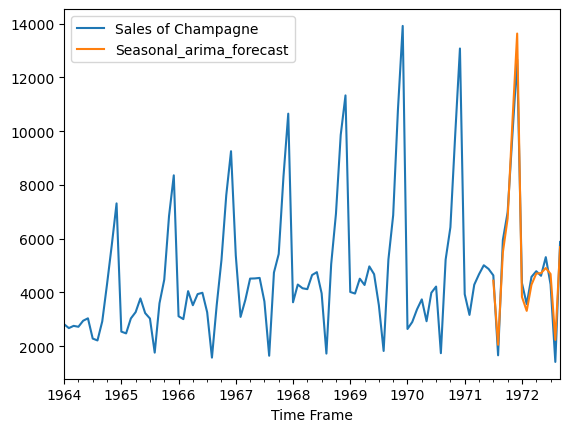

In [32]:
df[['Sales of Champagne','Seasonal_arima_forecast']].plot()

Here we observe that seasonal arima is able to capture seasonality of the data and hence predictions are good

### Predicting the future numbers

In [33]:
future_dates = [df.index[-1]+DateOffset(months = x) for x in range(0,24)]

In [34]:
future_dates

[Timestamp('1972-09-01 00:00:00'),
 Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00')]

In [35]:
df.head()

,Sales of Champagne,Sales_with_first_order_diff,Arima_forecast,Seasonal_arima_forecast
Time Frame,,,,
1964-01-01,2815,NaN,NaN,NaN
1964-02-01,2672,-143.0,NaN,NaN
1964-03-01,2755,83.0,NaN,NaN
1964-04-01,2721,-34.0,NaN,NaN
1964-05-01,2946,225.0,NaN,NaN


In [36]:
df.tail()

,Sales of Champagne,Sales_with_first_order_diff,Arima_forecast,Seasonal_arima_forecast
Time Frame,,,,
1972-05-01,4618,-170.0,5063.194752,4717.509822
1972-06-01,5312,694.0,5063.212391,4906.403440
1972-07-01,4298,-1014.0,5063.220407,4685.435522
1972-08-01,1413,-2885.0,5063.224050,2232.408061
1972-09-01,5877,4464.0,5063.225706,5686.557452


In [37]:
new_df =  pd.DataFrame(index = future_dates[1:], columns=df.columns)

In [38]:
new_df

,Sales of Champagne,Sales_with_first_order_diff,Arima_forecast,Seasonal_arima_forecast
1972-10-01,NaN,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN,NaN
1973-02-01,NaN,NaN,NaN,NaN
1973-03-01,NaN,NaN,NaN,NaN
1973-04-01,NaN,NaN,NaN,NaN
1973-05-01,NaN,NaN,NaN,NaN
1973-06-01,NaN,NaN,NaN,NaN
1973-07-01,NaN,NaN,NaN,NaN


In [39]:
forecast_df = pd.concat([df, new_df])

In [40]:
forecast_df.tail()

,Sales of Champagne,Sales_with_first_order_diff,Arima_forecast,Seasonal_arima_forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [41]:
forecast_df.shape

(128, 4)

In [42]:
forecast_df['Seasonal_arima_forecast'] = seasonal_arima.predict(start=90, end=128, dynamic=True)

In [43]:
forecast_df.tail()

,Sales of Champagne,Sales_with_first_order_diff,Arima_forecast,Seasonal_arima_forecast
1974-04-01,NaN,NaN,NaN,5180.664055
1974-05-01,NaN,NaN,NaN,5275.815998
1974-06-01,NaN,NaN,NaN,5384.162659
1974-07-01,NaN,NaN,NaN,5109.716882
1974-08-01,NaN,NaN,NaN,2673.163749


<AxesSubplot:>

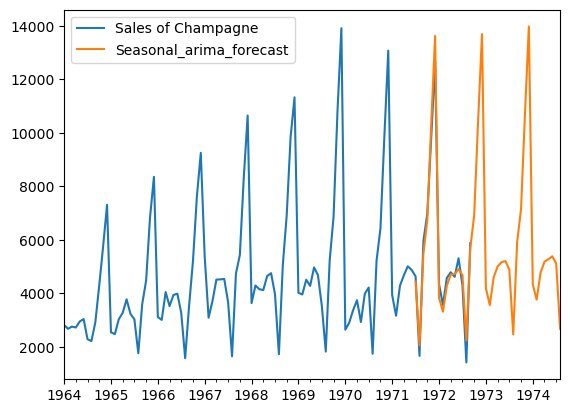

In [44]:
forecast_df[['Sales of Champagne', 'Seasonal_arima_forecast']].plot()